# Модуль 5. **Інші алгоритми навчання з учителем**

In [236]:
import zipfile
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

    Розпаковка архіву

In [237]:
zip_file_path = "homework.zip"

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall()

    Завантаження даних з файлів *.csv у датасет

In [238]:
dataset_path = Path("data")
csv_files = dataset_path.glob("**/*.csv")

df_list = []

for file_path in csv_files:
    df_from_file = pd.read_csv(file_path)
    df_from_file["activity"] = file_path.parent.name
    df_list.append(df_from_file)
df = pd.concat(df_list, ignore_index=True)

df

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,1.000776,4.616021,8.576031,idle
1,0.718261,4.209007,8.446744,idle
2,-0.909797,-0.282516,9.203311,idle
3,5.099650,0.148441,8.418014,idle
4,1.762132,-0.162806,9.251195,idle
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


    Аналіз даних

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193860 entries, 0 to 193859
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   accelerometer_X  193860 non-null  float64
 1   accelerometer_Y  193860 non-null  float64
 2   accelerometer_Z  193860 non-null  float64
 3   activity         193860 non-null  object 
dtypes: float64(3), object(1)
memory usage: 5.9+ MB


In [240]:
df["activity"].value_counts()

activity
running    102240
walking     55500
idle        31170
stairs       4950
Name: count, dtype: int64

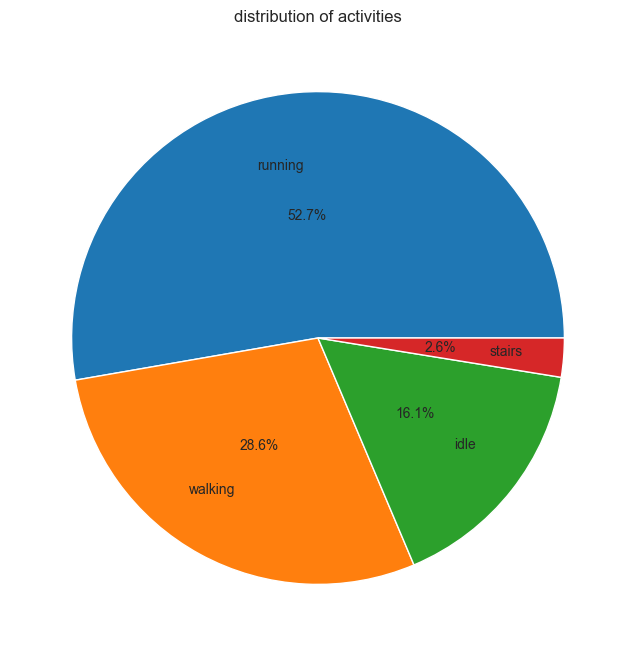

In [241]:
plt.figure(figsize=(8, 8))
plt.pie(
    df["activity"].value_counts(),
    labels=df["activity"].value_counts().index.tolist(),
    pctdistance=0.5,
    autopct="%1.1f%%",
    labeldistance=0.7,
)
plt.title("distribution of activities")
plt.show()

    Нормалізація за допомогою StandardScaler

In [242]:
columns_to_normalize = ["accelerometer_X", "accelerometer_Y", "accelerometer_Z"]

scaler = StandardScaler()
# scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,-0.109791,0.241917,0.941538,idle
1,-0.143404,0.209288,0.923560,idle
2,-0.337109,-0.150782,1.028762,idle
3,0.377889,-0.116234,0.919565,idle
4,-0.019205,-0.141185,1.035420,idle
...,...,...,...,...
193855,0.379029,-1.366884,-0.455385,walking
193856,0.529435,-1.069384,-1.394879,walking
193857,0.162535,-0.929271,-0.304241,walking
193858,-0.583227,-0.372659,-0.073862,walking


    Розділення датасету на навчальний і тестовий

In [243]:
# X = df[columns_to_normalize]
X = df.drop(columns=["activity"], axis=1)
y = df["activity"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    # train_size=0.2, # for testing only
    test_size=0.2,
    random_state=42,
)

print("Shape of X_train:\t", X_train.shape)
print("Shape of y_train:\t", y_train.shape)
print("Shape of X_test:\t", X_test.shape)
print("Shape of y_test:\t", y_test.shape)

Shape of X_train:	 (155088, 3)
Shape of y_train:	 (155088,)
Shape of X_test:	 (38772, 3)
Shape of y_test:	 (38772,)


    Точність моделей

In [244]:
print("Accuracy:")
accuracy_ = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] # init list
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
accuracy_[0] = accuracy_score(y_test, svm_predictions)
print("C-Support Vector Classification:\t", accuracy_[0])

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
accuracy_[1] = accuracy_score(y_test, rf_predictions)
print("Random Forest Classification:\t\t", accuracy_[1])

et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)
et_predictions = et_model.predict(X_test)
accuracy_[2] = accuracy_score(y_test, et_predictions)
print("Extra Trees Classification:\t\t", accuracy_[2])

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
accuracy_[3] = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classification:\t", accuracy_[3])

hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train, y_train)
hgb_predictions = hgb_model.predict(X_test)
accuracy_[4] = accuracy_score(y_test, hgb_predictions)
print("Hist Gradient Boosting Classification:\t", accuracy_[4])

v_model = VotingClassifier(
    estimators=[
        ("svm", SVC()),
        ("rf", RandomForestClassifier()),
        ("et", ExtraTreesClassifier()),
        ("gb", GradientBoostingClassifier()),
        ("hgb", HistGradientBoostingClassifier()),
    ],
    voting="hard",
)
v_model.fit(X_train, y_train)
v_predictions = v_model.predict(X_test)
accuracy_[5] = accuracy_score(y_test, v_predictions)
print("Voting Classification:\t\t\t", accuracy_[5])

Accuracy:
C-Support Vector Classification:	 0.8923965748478283
Random Forest Classification:		 0.9995873310636542
Extra Trees Classification:		 0.9995615392551326
Gradient Boosting Classification:	 0.902893840916125
Hist Gradient Boosting Classification:	 0.9596616114721964
Voting Classification:			 0.963891468069741


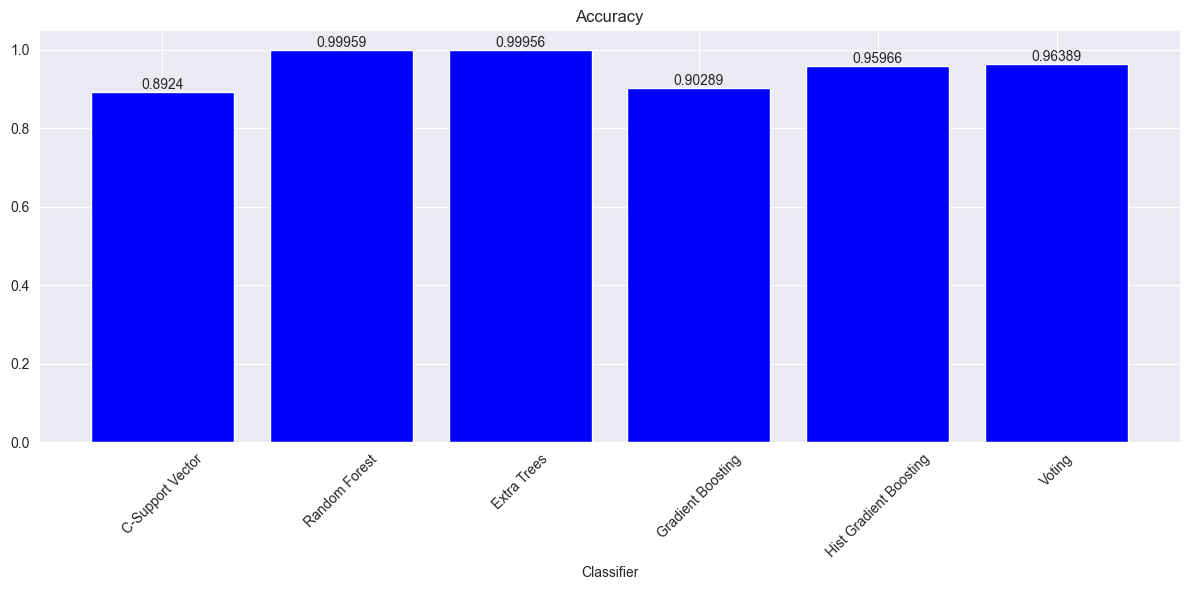

In [245]:
plt.figure(figsize=(12, 6))
plt.title("Accuracy")
plt.xlabel("Classifier")
plt.xticks(rotation=45)
x_labels = [
    "C-Support Vector",
    "Random Forest",
    "Extra Trees",
    "Gradient Boosting",
    "Hist Gradient Boosting",
    "Voting",
]
bars = plt.bar(x_labels, accuracy_, color="blue")
plt.tight_layout()

for bar in bars:
    val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        val,
        round(val, 5),
        va="bottom",
        ha="center",
    )

plt.show()

    Classification Report для всіх моделей (попарно)

In [246]:
print("C-Support Vector Classification Report:")
print("---------------------------------------")
print(classification_report(y_test, svm_predictions), "\n")

print("Random Forest Classification Report:")
print("------------------------------------")
print(classification_report(y_test, rf_predictions))

C-Support Vector Classification Report:
---------------------------------------
              precision    recall  f1-score   support

        idle       0.96      0.98      0.97      6203
     running       0.93      0.90      0.92     20485
      stairs       1.00      0.00      0.00      1022
     walking       0.80      0.90      0.85     11062

    accuracy                           0.89     38772
   macro avg       0.92      0.70      0.68     38772
weighted avg       0.90      0.89      0.88     38772
 

Random Forest Classification Report:
------------------------------------
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       1.00      1.00      1.00     20485
      stairs       1.00      0.99      0.99      1022
     walking       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      

In [247]:
print("Extra Trees Classification Report:")
print("----------------------------------")
print(classification_report(y_test, et_predictions), "\n")

print("Gradient Boosting Classification Report:")
print("----------------------------------------")
print(classification_report(y_test, gb_predictions))

Extra Trees Classification Report:
----------------------------------
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       1.00      1.00      1.00     20485
      stairs       1.00      0.99      0.99      1022
     walking       1.00      1.00      1.00     11062

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772
 

Gradient Boosting Classification Report:
----------------------------------------
              precision    recall  f1-score   support

        idle       0.98      0.98      0.98      6203
     running       0.93      0.92      0.92     20485
      stairs       1.00      0.06      0.12      1022
     walking       0.82      0.90      0.86     11062

    accuracy                           0.90     38772
   macro avg       0.93      0.72      0.72     38772
weighted avg       0.91      0.

In [248]:
print("Hist Gradient Boosting Classification Report:")
print('---------------------------------------------')
print(classification_report(y_test, hgb_predictions), "\n")

print("Voting Classification Report:")
print('-----------------------------')
print(classification_report(y_test, v_predictions))

Hist Gradient Boosting Classification Report:
---------------------------------------------
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       0.98      0.96      0.97     20485
      stairs       0.98      0.60      0.75      1022
     walking       0.90      0.97      0.94     11062

    accuracy                           0.96     38772
   macro avg       0.97      0.88      0.91     38772
weighted avg       0.96      0.96      0.96     38772
 

Voting Classification Report:
-----------------------------
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       0.98      0.96      0.97     20485
      stairs       1.00      0.70      0.82      1022
     walking       0.91      0.97      0.94     11062

    accuracy                           0.96     38772
   macro avg       0.97      0.91      0.93     38772
weighted avg       0.97      0.

    Confusion Matrix для всіх моделей

In [249]:
ticklabels = df["activity"].unique()

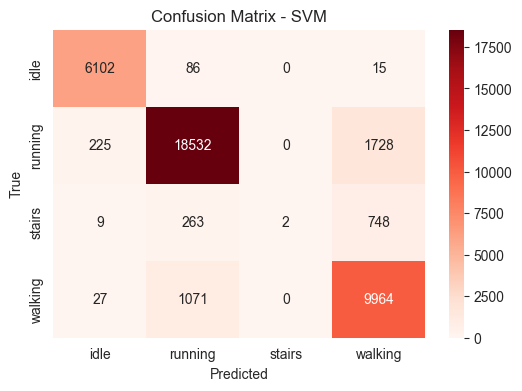

In [250]:
svm_cm = confusion_matrix(y_test, svm_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(
    data=svm_cm,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=ticklabels,
    yticklabels=ticklabels,
)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

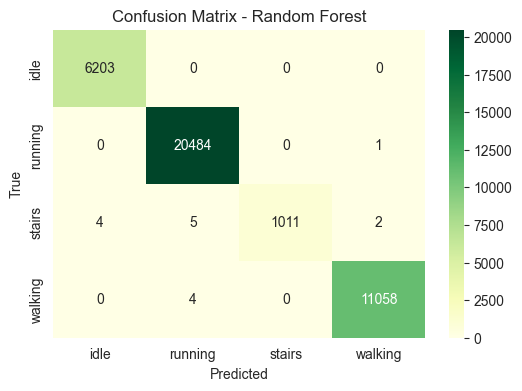

In [251]:
rf_cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(
    rf_cm,
    annot=True,
    fmt="d",
    cmap="YlGn",
    xticklabels=ticklabels,
    yticklabels=ticklabels,
)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

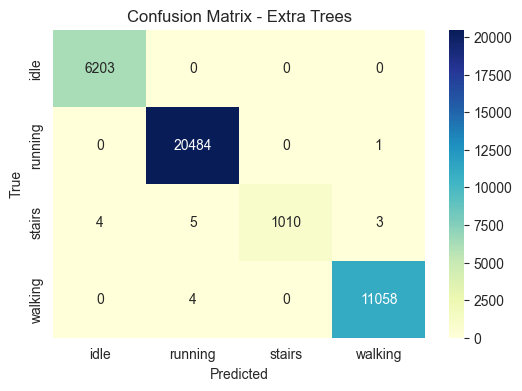

In [252]:
et_cm = confusion_matrix(y_test, et_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(
    et_cm,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=ticklabels,
    yticklabels=ticklabels,
)
plt.title("Confusion Matrix - Extra Trees")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

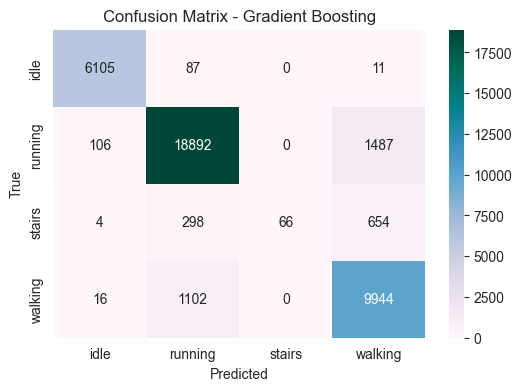

In [253]:
gb_cm = confusion_matrix(y_test, gb_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(
    gb_cm,
    annot=True,
    fmt="d",
    cmap="PuBuGn",
    xticklabels=ticklabels,
    yticklabels=ticklabels,
)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

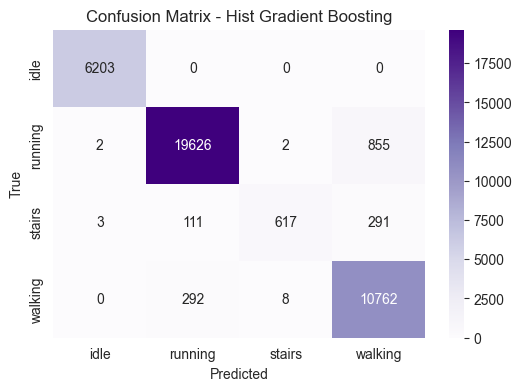

In [254]:
hgb_cm = confusion_matrix(y_test, hgb_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(
    hgb_cm,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=ticklabels,
    yticklabels=ticklabels,
)
plt.title("Confusion Matrix - Hist Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

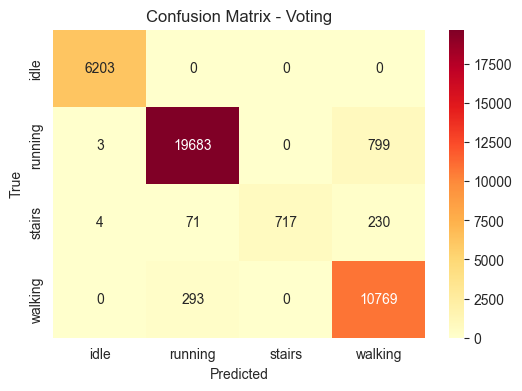

In [255]:
v_cm = confusion_matrix(y_test, v_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(
    v_cm,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    xticklabels=ticklabels,
    yticklabels=ticklabels,
)
plt.title("Confusion Matrix - Voting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()